In [1]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [2]:
url = "/home/lionel/Desktop/Malaysia_Crop/training.csv"
df = pd.read_csv(url)

In [3]:
# specify the names of the features (i.e. band names) and label
# feature names used to extract out features and define what bands

feature_names = ['B1','B10','B11', 'B2', 'B3','B4', 'B5', 'B6', 'B7']
label = "landcover"

In [4]:
# get the features and labels into separate variables
X = df[feature_names]
y = df[label]

In [5]:
y.value_counts()

0    300
1    300
2    300
Name: landcover, dtype: int64

In [6]:
# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [7]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# %matplotlib inline 

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.pipeline import Pipeline

# import imblearn
# from imblearn.over_sampling import SMOTE
# import pickle 

In [9]:
# def trainModel(X,y):
    
#     #Split data
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=123)
        
#     # instantiate model
#     model = RandomForestClassifier(n_estimators=250)
  

#      # Scaling training data ONLY:
#     smt = SMOTE(random_state = 123)
#     X_train_smote, y_train_smote = smt.fit_resample(X_train,y_train)
    
#     # fit model on scaled training data:
#     model = model.fit(X_train_smote, y_train_smote)
    


In [10]:
# trained_rf_model = trainModel(X,y)

In [11]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [12]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.9911111111111112

In [13]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[75,  0,  0],
       [ 0, 75,  0],
       [ 2,  0, 73]])

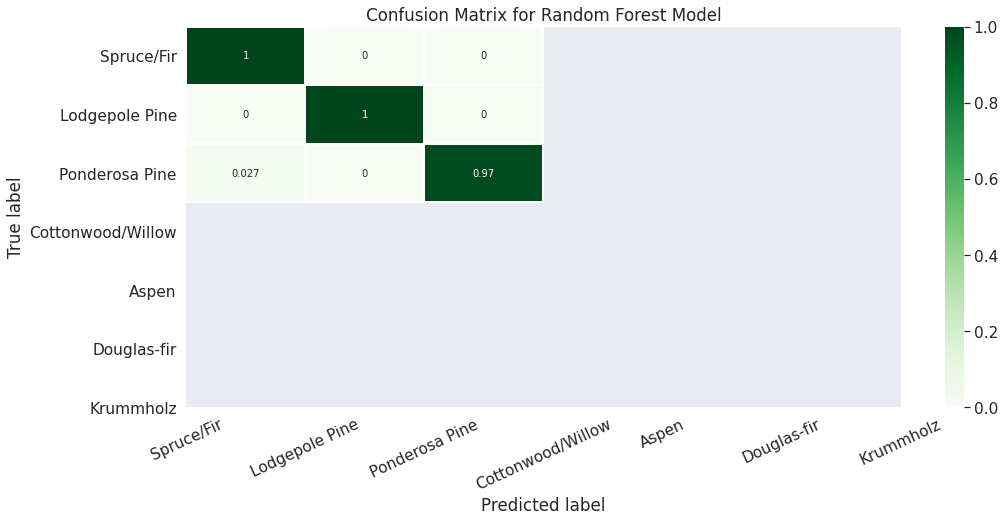

In [14]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [15]:
!pip install geemap scikit-learn

In [16]:
import ee
import geemap
import pandas as pd

from geemap import ml
from sklearn import ensemble

In [17]:
geemap.ee_initialize()

In [18]:
# convert the estimator into a list of strings
# this function also works with the ensemble.ExtraTrees estimator
trees =  ml.rf_to_strings(forest,feature_names)

In [19]:
# print the first tree to see the result
print(trees[0])

1) root 407 9999 9999 (2.453493826457409)
  2) B5 <= 0.222958 407 0.6666 0.000000
    4) B1 <= 0.126224 1 0.0000 2.000000 *
    5) B1 > 0.126224 130 0.0000 1.000000 *
  3) B5 > 0.222958 407 0.6666 0.000000
    6) B4 <= 0.050901 276 0.5148 0.000000
      12) B11 <= 290.921646 190 0.3980 2.000000
        24) B2 <= 0.094014 150 0.1311 2.000000
          48) B6 <= 0.125620 5 0.0000 2.000000 *
          49) B6 > 0.125620 5 0.0000 0.000000 *
        25) B2 > 0.094014 150 0.1311 2.000000
          50) B10 <= 294.311935 132 0.0000 2.000000 *
          51) B10 > 294.311935 8 0.0000 0.000000 *
      13) B11 > 290.921646 190 0.3980 2.000000
        26) B10 <= 294.544220 1 0.0000 2.000000 *
        27) B10 > 294.544220 39 0.0000 0.000000 *
    7) B4 > 0.050901 276 0.5148 0.000000
      14) B11 <= 292.275452 86 0.0890 0.000000
        28) B6 <= 0.120172 1 0.0000 1.000000 *
        29) B6 > 0.120172 83 0.0000 0.000000 *
      15) B11 > 292.275452 2 0.0000 1.000000 *



In [20]:
print(trees[1])

1) root 429 9999 9999 (2.5437065518304824)
  2) B4 <= 0.066011 429 0.6664 1.000000
    4) B7 <= 0.052087 282 0.5000 2.000000
      8) B10 <= 294.563904 138 0.0000 2.000000 *
      9) B10 > 294.563904 23 0.0000 0.000000 *
    5) B7 > 0.052087 282 0.5000 2.000000
      10) B7 <= 0.053845 121 0.0518 0.000000
        20) B5 <= 0.345122 10 0.0000 0.000000 *
        21) B5 > 0.345122 2 0.0000 2.000000 *
      11) B7 > 0.053845 121 0.0518 0.000000
        22) B10 <= 294.387650 109 0.0116 0.000000
          44) B11 <= 290.589127 5 0.0000 0.000000 *
          45) B11 > 290.589127 1 0.0000 2.000000 *
        23) B10 > 294.387650 103 0.0000 0.000000 *
  3) B4 > 0.066011 429 0.6664 1.000000
    6) B2 <= 0.110017 147 0.0566 1.000000
      12) B6 <= 0.130767 9 0.0000 1.000000 *
      13) B6 > 0.130767 2 0.0000 0.000000 *
    7) B2 > 0.110017 147 0.0566 1.000000
      14) B6 <= 0.176335 135 0.0000 1.000000 *
      15) B6 > 0.176335 1 0.0000 0.000000 *



In [21]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)

In [22]:
ee_classifier.getInfo()

{'type': 'Classifier.decisionTreeEnsemble',
 'treeStrings': ['1) root 407 9999 9999 (2.453493826457409)\n  2) B5 <= 0.222958 407 0.6666 0.000000\n    4) B1 <= 0.126224 1 0.0000 2.000000 *\n    5) B1 > 0.126224 130 0.0000 1.000000 *\n  3) B5 > 0.222958 407 0.6666 0.000000\n    6) B4 <= 0.050901 276 0.5148 0.000000\n      12) B11 <= 290.921646 190 0.3980 2.000000\n        24) B2 <= 0.094014 150 0.1311 2.000000\n          48) B6 <= 0.125620 5 0.0000 2.000000 *\n          49) B6 > 0.125620 5 0.0000 0.000000 *\n        25) B2 > 0.094014 150 0.1311 2.000000\n          50) B10 <= 294.311935 132 0.0000 2.000000 *\n          51) B10 > 294.311935 8 0.0000 0.000000 *\n      13) B11 > 290.921646 190 0.3980 2.000000\n        26) B10 <= 294.544220 1 0.0000 2.000000 *\n        27) B10 > 294.544220 39 0.0000 0.000000 *\n    7) B4 > 0.050901 276 0.5148 0.000000\n      14) B11 <= 292.275452 86 0.0890 0.000000\n        28) B6 <= 0.120172 1 0.0000 1.000000 *\n        29) B6 > 0.120172 83 0.0000 0.000000 *

In [23]:
# Make a cloud-free Landsat 8 TOA composite (from raw imagery).
l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1');
# l8 = ee.ImageCollection("LANDSAT/LC08/C01/T1_TOA")


image = ee.Algorithms.Landsat.simpleComposite(
  collection= l8.filterDate('2018-01-01', '2021-01-31'),
  asFloat= True
)

In [24]:
classified = image.select(feature_names).classify(ee_classifier)

In [25]:
# display results
Map = geemap.Map(center=(6.155672,100.569649), zoom=11)
Map.addLayer(image,{"bands": ['B1', 'B5','B6'], "min":0.05, "max": 0.55, "gamma":1.5}, 'image')
Map.addLayer(classified, {"min": 0, "max": 2, "palette": ['red', 'green', 'blue']},'classification')

Map

Map(center=[6.155672, 100.569649], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox…